# ¿A dónde realizan su primera reserva los nuevos usuarios de Airbnb?

Durante este práctico vamos a trabajar sobre el dataset [Airbnb New User Bookings](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data) de Kaggle.

Airbnb nos ofrece una lista de usuarios (todos de EEUU) junto con sus datos demográficos, registros de sesiones web y algunas estadísticas extras. Hay 12 posibles resultados del país de destino:  __US__, __FR__, __CA__, __GB__, __ES__, __IT__, __PT__, __NL__, __DE__, __AU__, __NDF__ (no se ha encontrado ningún destino), y __other__. 

Las variables con las que trabaja el dataset son:
 * __id__: identificación de usuario.
 * __date_account_created__: fecha de la creación de la cuenta.
 * __timestamp_first_active__: timestamp de primera actividad.
 * __date_first_booking__: fecha de primer viaje.
 * __gender__: género.
 * __age__: edad.
 * __signup_method__: método de registración.
 * __signup_flow__: la página desde la cual un usuario vino a registrarse.
 * __language__: preferencia de idioma internacional.
 * __affiliate_channel__: tipo de marketing pagado.
 * __affiliate_provider__: de donde es el marketing.
 * __first_affiliate_tracked__: seguimiento previo a la registración.
 * __signup_app__: aplicación de registración.
 * __first_device_type__: tipo de dispositivo.
 * __first_browser__: búscador.
 * __country_destination__: país escogido para realizar un viaje.

## Objetivo y alcance:

En este laboratorio realizaremos un trabajo de exploración sobre el dataset de Airbnb y luego una posterior comunicación de dichos resultados, pensando que nuestro análisis será utilizado por el __área de marketing de la empresa__, para el diseño de nuevas estrategias comerciales.

  * Realizar análisis de estadística descriptiva sobre los datos, tanto en una como en múltiples variables.
  * Comunicar aspectos de los datos a través de visualizaciones.
  * Resolver y proponer preguntas de interpretación no triviales.

## Estructura del informe:

  * Jupyter Notebook con el análisis realizado.
  * Reporte para el área de marketing, el formato queda a libre consideración del alumno, por ejemplo: página web, whitepaper, presentación, etc.  

---

In [99]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [100]:
#data from csv files is imported to pandas data frames
data= pd.read_csv("../Datos/data.csv") #Path a los datos
data.head(20)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [101]:
data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [102]:
data['date_first_booking'].isnull()[:10].sum()


2

Podemos ver que el dataset no se encuentra completo, ya que __date_first_booking__, __age__ y __first_affiliate_tracked__ tienen valores NaN. Sin embargo, siempre debemos examinar con cierta cautela nuestros datos, por que por ejemplo en la categoría __gender__ tenemos valores _unknown_, que para el caso serían lo mismo que un NaN.

In [103]:
#replacing gender and age values which are not present to Nan
# data.query('gender=="-unknown-"') -- 95688 unknown

data.gender.replace('-unknown-',np.nan, inplace=True)
data.gender.isnull().sum()



95688

In [104]:
data.age.replace('NaN', np.nan, inplace=True)
data.age.isnull().sum()

87990

Tratamiento de outliers de __age__

In [105]:
data.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

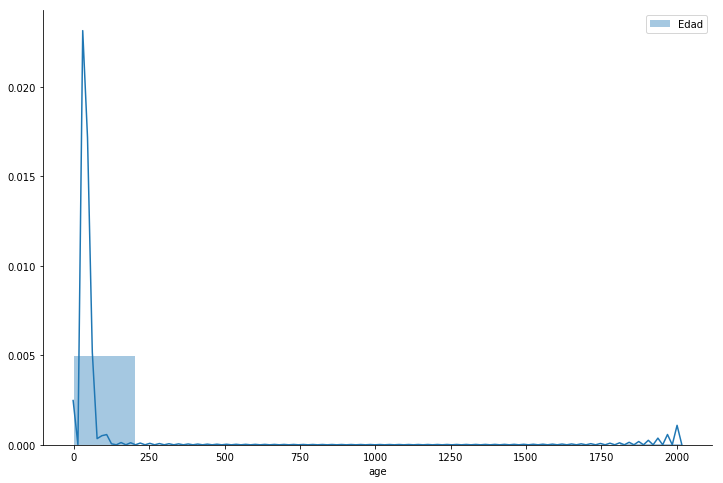

In [106]:
plt.figure(figsize=(12,8))
sns.distplot(data['age'].dropna(),bins=10, label='Edad')
plt.legend(bbox_to_anchor=(1, 1))
sns.despine()

In [107]:
data.query(' age > 100').age.count()

2345

Elimino los registros con __age__ mayores a 100

In [108]:
data = data[data.age<100]


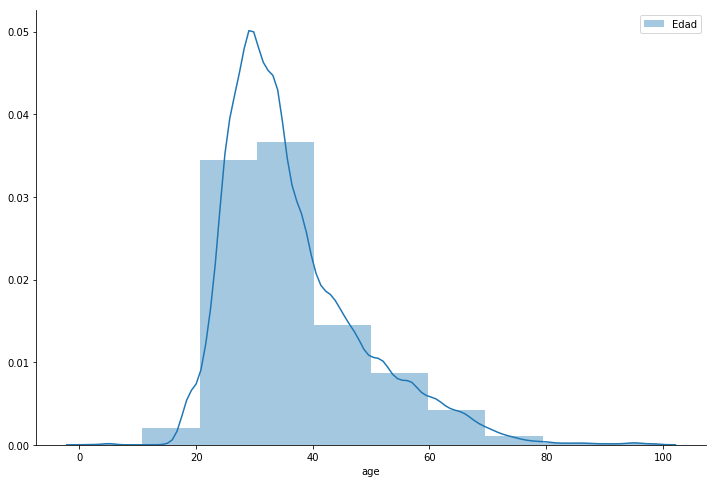

In [109]:
plt.figure(figsize=(12,8))
sns.distplot(data['age'].dropna(),bins=10, label='Edad')
plt.legend(bbox_to_anchor=(1, 1))
sns.despine()

¿Tiene sentido buscar outliers en esta distribucion? ¿no son datos validos?

In [110]:
#find first and third quartile
q1, q3= np.percentile(data['age'].dropna(),[25,75])
q1, q3

(28.0, 42.0)

In [111]:
#Find the IQR, which is the difference between third and first quartile
iqr = q3 - q1
iqr

14.0

In [112]:
#Find lower and upper bound
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
lower_bound, upper_bound

(7.0, 63.0)

In [113]:
data.query(' age < @lower_bound').age.count()

57

In [114]:
data.query(' age > @upper_bound').age.count()

4231

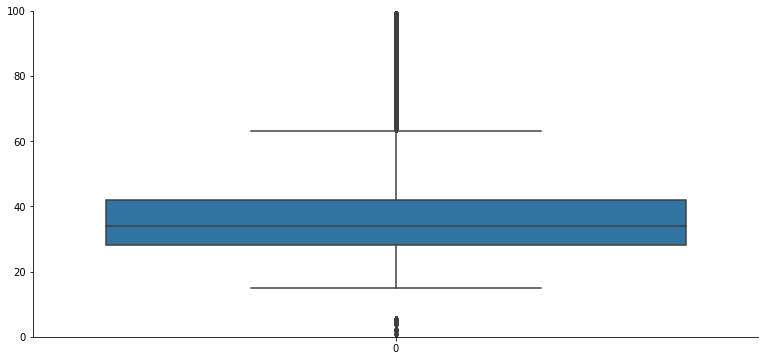

In [115]:
data_age_dropna = sorted(data['age'].dropna())

plt.figure(figsize=(13,6))
plt.ylim(ymax = 100, ymin = 0)
sns.boxplot(data=data_age_dropna)
sns.despine()
plt.show()

Procedimiento para eliminar outliers usando n desviaciones std de la media

In [116]:
age = data.age 
print(age.std())
mask_age = np.abs(age - age.mean()) <= (2.5 * age.std())
data_age_no_outliers = age[ mask_age ]
data_age_no_outliers
print("Filas removidas", age.count() - data_age_no_outliers.count())
print("edad max considerada", data_age_no_outliers.max())
print("edad min considerada", data_age_no_outliers.min())


11.673193962187689
Filas removidas 3223
edad max considerada 65.0
edad min considerada 15.0


Por ahora decido no eliminar mas outliers (solo elimine los que tienen __age__ > 100).


Seguimos con la edad. Conviene armar rangos etarios. Creamos una nueva columna __age_range__ para almacenar el rango de edad.


In [117]:
# otra forma, haciendo pd.cut y pasando directamente el intervalo

data.insert(7,"age_range", pd.cut( data.age.dropna(),[15,25,35,45,55,75,100]) )

In [118]:
data[['age', 'age_range']].query('age>75')[:35]

,age,age_range
645,95.0,"(75, 100]"
777,94.0,"(75, 100]"
1048,79.0,"(75, 100]"
1619,98.0,"(75, 100]"
1822,76.0,"(75, 100]"
1879,87.0,"(75, 100]"
1889,92.0,"(75, 100]"
2497,84.0,"(75, 100]"
2675,78.0,"(75, 100]"
2825,99.0,"(75, 100]"



Convertimos __date_first_booking__ a datetime...


In [119]:
data.date_first_booking = pd.to_datetime( data.date_first_booking )

Convertimos __date_account_created__ a datetime...

In [120]:
data.date_account_created = pd.to_datetime( data.date_account_created )

Agregamos columna __month_of_booking__ porque la vamos a usar mas adelante

In [121]:
data['month_of_booking'] = data.date_first_booking.dt.month

## Laboratorio:

Este laboratorio tiene como objetivo principal el de emular el trabajo de un __Data Scientist__ de Airbnb, al cual le han encomendado la tarea de analizar a fondo los datos y generar recomendaciones para el área de marketing. Nuestra tarea entonces será la de explotar los conocimientos adquiridos y las herramientas a nuestra disposición para transformar los _datos_ en _conocimiento_.

A continuación les presento una serie de preguntas obligatorias que se deben responder, sin embargo los invito a que cada uno se tome las libertades que crean convenientes para enriquecer aún más el análisis y por consiguiente los resultados.

**1.** ¿Cuáles son los destinos escogidos, segmentados por género y edad?

**2.** ¿Cuántas cuentas han sido creadas por año?

**3.** ¿Cuántos viajes se han realizados por año?

**4.** Corregir el formato de __timestamp_first_active__ para poder leerlo como una fecha.

**5.** ¿Qué porcentaje de los usuarios realizaron una búsqueda en Airbnb, previo a proceder con la creación de su cuenta? (Ayuda: ver __timestamp_first_active__).

**6.** ¿Cuál es el tiempo promedio entre __timestamp_first_active__ y __date_account_created__?

**7.** ¿Cuál es el tiempo promedio entre __date_account_created__ y __date_first_booking__?

**8.** ¿Qué podemos extraer como conclusión de las preguntas 7 y 8?

**9.** ¿Hay un __signup_method__ preferido?, ¿Y segmentado por sexo?, ¿Y por edad?

**10.** ¿Hay un __signup_app__ preferido?, ¿Y por sexo?, ¿Y por edad?

**11.** ¿Cuál es el dispositivo más usado, según el sexo y la edad de los usuarios?

**12.** Si bien los usuarios son de EEUU, ¿Existen usuarios con otras preferencias idiomáticas?

**13.** ¿Existe alguna correlación entre el lugar elegido y la edad de los usuarios?

**14.** Graficar la cantidad de viajes por fecha. ¿Existe alguna tendencia?

**15.** Graficar la actividad de los usuarios por día de la semana. ¿Cómo afecta esto a las campañas de marketing?

Finalmente, con todas las respuestas obligatorias más las que ustedes mismos se hayan formulado, los invito a realizar un informe, en el formato que más les guste, el cual será presentado al "área de marketing de Airbnb". Como premisa principal, la comunicación tiene que ser entendible y concreta.

#### Resolución

**1.** ¿Cuáles son los destinos escogidos, segmentados por género y edad?


In [122]:
# solo por las dudas, verifico que si no eligio destino, date_first_booking no tiene datos
data.query('country_destination == "NDF"')['date_first_booking'].count()

0

In [123]:
data.groupby(['gender','age_range','country_destination']).gender.count()

gender  age_range  country_destination
FEMALE  (15, 25]   AU                        12
                   CA                        43
                   DE                        60
                   ES                       162
                   FR                       274
                   GB                       131
                   IT                       161
                   NDF                     4007
                   NL                        48
                   PT                        16
                   US                      2701
                   other                    365
        (25, 35]   AU                       100
                   CA                       206
                   DE                       143
                   ES                       384
                   FR                       804
                   GB                       332
                   IT                       452
                   NDF                    11435
 

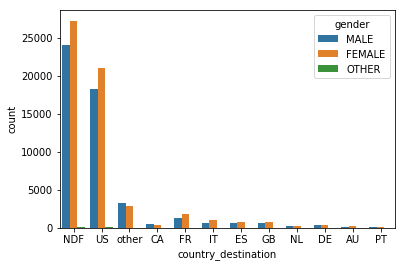

In [124]:
sns.countplot(data=data, x="country_destination", hue="gender")

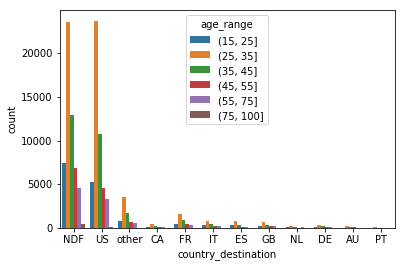

In [125]:
sns.countplot(data=data, x="country_destination", hue="age_range")

**2.** Cuantas cuentas han sido creadas por año

In [126]:
data.groupby(data.date_account_created.dt.year).date_account_created.count()

date_account_created
2010     1679
2011     7521
2012    25241
2013    47049
2014    41600
Name: date_account_created, dtype: int64

**3.** ¿Cuántos viajes se han realizados por año?

In [127]:
data.groupby(data.date_first_booking.dt.year).date_first_booking.count()

date_first_booking
2010.0      950
2011.0     3768
2012.0    12002
2013.0    23529
2014.0    25404
2015.0     1549
Name: date_first_booking, dtype: int64

**4.** Corregir el formato de __timestamp_first_active__ para poder leerlo como una fecha.

In [128]:
data.timestamp_first_active[:5]

1    20090523174809
2    20090609231247
3    20091031060129
4    20091208061105
6    20100102012558
Name: timestamp_first_active, dtype: int64

In [129]:
data.timestamp_first_active=pd.to_datetime((data.timestamp_first_active // 1000000), format='%Y%m%d')

In [130]:
data.timestamp_first_active.head()

1   2009-05-23
2   2009-06-09
3   2009-10-31
4   2009-12-08
6   2010-01-02
Name: timestamp_first_active, dtype: datetime64[ns]

**5.** ¿Qué porcentaje de los usuarios realizaron una búsqueda en Airbnb, previo a proceder con la creación de su cuenta? (Ayuda: ver __timestamp_first_active__).

In [131]:
data.date_account_created.head()

1   2011-05-25
2   2010-09-28
3   2011-12-05
4   2010-09-14
6   2010-01-02
Name: date_account_created, dtype: datetime64[ns]

In [132]:
data.query ( 'timestamp_first_active > date_account_created ' ).timestamp_first_active.count()

0

In [133]:
data.query ( 'timestamp_first_active == date_account_created ' ).timestamp_first_active.count()

122935

In [134]:
# cantidad de usuarios que comenzaron a utilizar el servicio sin haber dado de alta la cuenta

number_of_users_preactive = data.query ( 'timestamp_first_active < date_account_created ' ).timestamp_first_active.count()
print(number_of_users_preactive)
total_number_of_users = data.date_account_created.count()
print (total_number_of_users)

155
123090


In [135]:
percentage_of_users_preactive = (number_of_users_preactive / total_number_of_users) * 100
percentage_of_users_preactive

0.12592412056219027

**6.** ¿Cuál es el tiempo promedio entre __timestamp_first_active__ y __date_account_created__?

In [136]:
ds = data.timestamp_first_active - data.date_account_created
ds.mean()

Timedelta('-1 days +15:05:40.960272')

**7.** ¿Cuál es el tiempo promedio entre __date_account_created__ y __date_first_booking__?

In [137]:
# date_first_booking tiene NaT

#data[['date_account_created','date_first_booking']][:5]
data['date_first_booking'][:5].isnull()

1     True
2    False
3    False
4    False
6    False
Name: date_first_booking, dtype: bool

In [138]:
data['date_account_created'][:5]

1   2011-05-25
2   2010-09-28
3   2011-12-05
4   2010-09-14
6   2010-01-02
Name: date_account_created, dtype: datetime64[ns]

In [139]:
data['time_booking_account'] = data.date_first_booking - data.date_account_created

In [140]:
data['time_booking_account'].describe()

count                      67202
mean     50 days 17:21:49.568167
std      92 days 14:05:13.626335
min          -349 days +00:00:00
25%              1 days 00:00:00
50%              4 days 00:00:00
75%             46 days 00:00:00
max            365 days 00:00:00
Name: time_booking_account, dtype: object

In [141]:
data['time_booking_account'].mean()

Timedelta('50 days 17:21:49.568167')

**9.** ¿Hay un __signup_method__ preferido?, ¿Y segmentado por sexo?, ¿Y por edad?

**10.** ¿Hay un __signup_app__ preferido?, ¿Y por sexo?, ¿Y por edad?


In [142]:
data.groupby(['signup_method']).signup_method.count()

signup_method
basic       65616
facebook    57333
google        141
Name: signup_method, dtype: int64

In [143]:
data.groupby(['signup_app']).signup_app.count()

signup_app
Android      2289
Moweb        2324
Web        108652
iOS          9825
Name: signup_app, dtype: int64

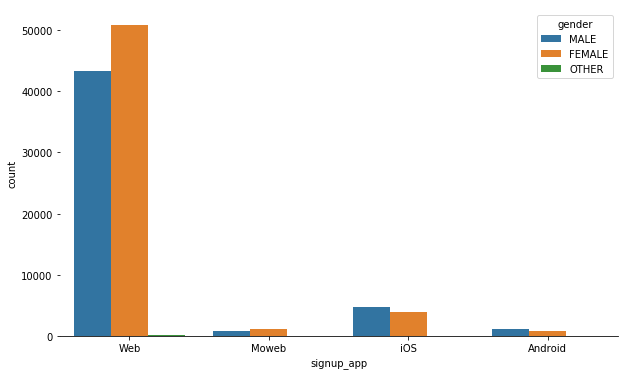

In [144]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='signup_app',hue='gender')
sns.despine(left=True)           

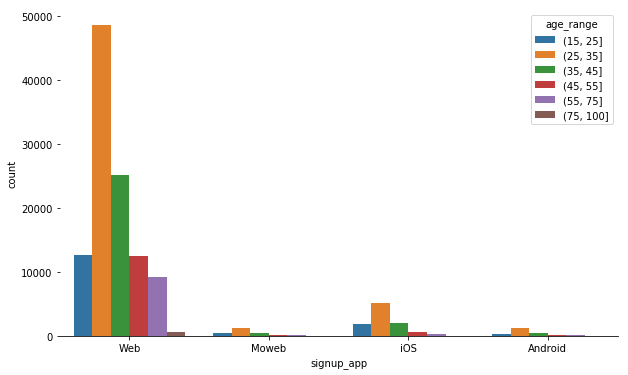

In [145]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='signup_app',hue='age_range')
sns.despine(left=True)           

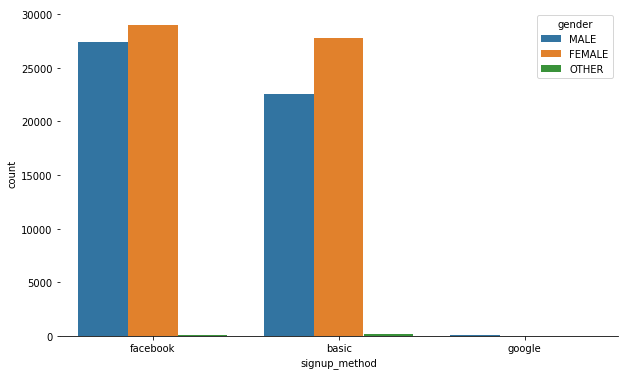

In [146]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='signup_method', hue='gender')
sns.despine(left=True)  

**11.** ¿Cuál es el dispositivo más usado, según el sexo y la edad de los usuarios?

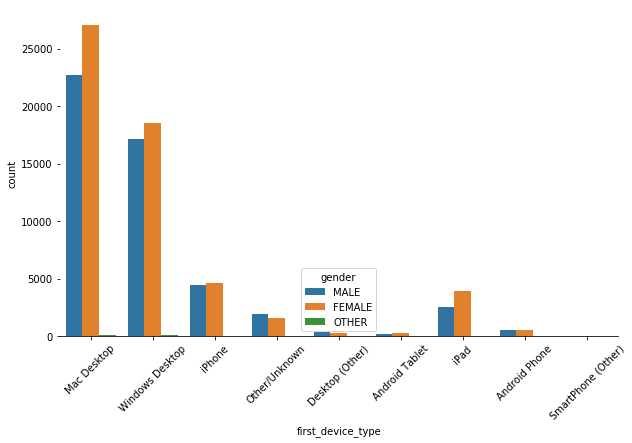

In [147]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='first_device_type',hue='gender')
plt.xticks(rotation=45)
sns.despine(left=True)

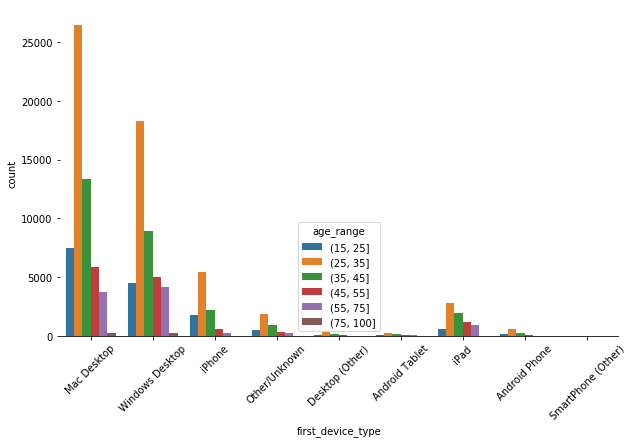

In [148]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='first_device_type',hue='age_range')
plt.xticks(rotation=45)
sns.despine(left=True)

**12.** Si bien los usuarios son de EEUU, ¿Existen usuarios con otras preferencias idiomáticas?

In [149]:
data.language.unique()

array(['en', 'de', 'es', 'fr', 'zh', 'ko', 'it', 'ru', 'ja', 'pt', 'nl',
       'sv', 'pl', 'hu', 'da', 'id', 'fi', 'no', 'tr', 'el', 'th', 'cs',
       'hr', 'ca', 'is'], dtype=object)

In [150]:
data.language.describe()

count     123090
unique        25
top           en
freq      118620
Name: language, dtype: object

In [151]:
data.groupby('language').language.count()

language
ca         4
cs        18
da        33
de       410
el        22
en    118620
es       633
fi        11
fr       812
hr         2
hu        15
id        17
is         4
it       361
ja       128
ko       397
nl        53
no        20
pl        42
pt       170
ru       269
sv        78
th        18
tr        45
zh       908
Name: language, dtype: int64

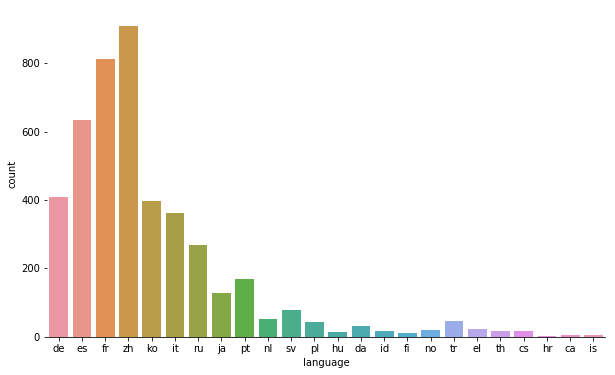

In [152]:
# veamos lenguage que no sean ingles...

plt.figure(figsize=(10,6))
sns.countplot(data=data.query('language!="en"'), x='language')
#plt.xticks(rotation=45)
sns.despine(left=True)

**13.** ¿Existe alguna correlación entre el lugar elegido y la edad de los usuarios?


In [153]:
data_country_selected = data.query('country_destination != "NDF"')
data_country_selected[['country_destination','age']][:10]

,country_destination,age
2,US,56.0
3,other,42.0
4,US,41.0
6,US,46.0
7,US,47.0
8,US,50.0
9,US,46.0
10,US,36.0
15,CA,33.0
17,US,31.0


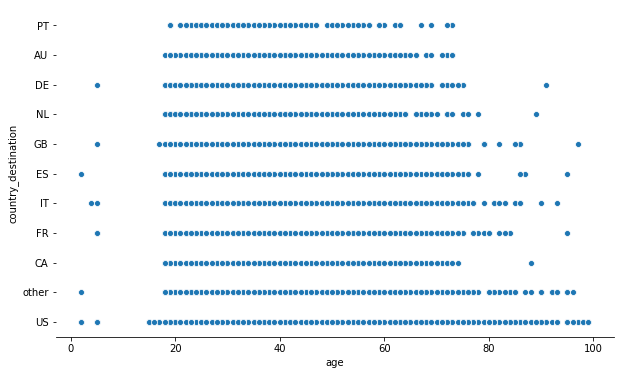

In [154]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=data_country_selected['country_destination'], x=data_country_selected['age'])
sns.despine(left=True)

**14.** Graficar la cantidad de viajes por fecha. ¿Existe alguna tendencia?

In [155]:
# cuantos usuarios no viajaron
ds_not_traveled=data.query('date_first_booking.isnull()')
ds_not_traveled.describe()

,age,signup_flow,month_of_booking,time_booking_account
count,55888.000000,55888.000000,0.0,0
mean,37.009573,2.622083,NaN,NaT
std,12.220243,6.624973,NaN,NaT
min,1.000000,0.000000,NaN,NaN
25%,28.000000,0.000000,NaN,NaT
50%,34.000000,0.000000,NaN,NaT
75%,43.000000,0.000000,NaN,NaT
max,99.000000,25.000000,NaN,NaT


In [156]:
# cuantos usuarios viajaron
ds_traveled=data.query('date_first_booking.isnull() == False')
ds_traveled.describe()

,age,signup_flow,month_of_booking,time_booking_account
count,67202.000000,67202.000000,67202.000000,67202
mean,36.132883,2.442844,6.128940,50 days 17:21:49.568167
std,11.182408,6.527613,3.191291,92 days 14:05:13.626335
min,2.000000,0.000000,1.000000,-349 days +00:00:00
25%,28.000000,0.000000,4.000000,1 days 00:00:00
50%,33.000000,0.000000,6.000000,4 days 00:00:00
75%,41.000000,0.000000,9.000000,46 days 00:00:00
max,99.000000,25.000000,12.000000,365 days 00:00:00


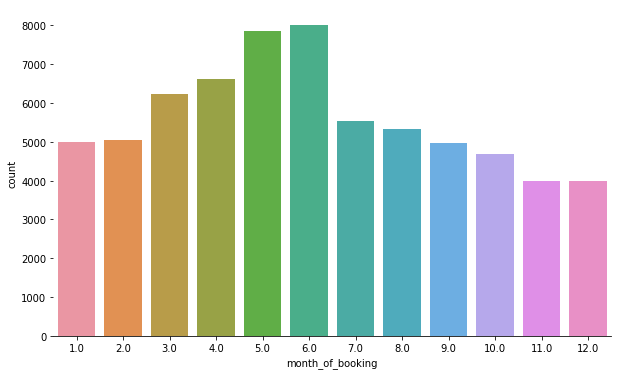

In [157]:

plt.figure(figsize=(10,6))
sns.countplot(data=ds_traveled, x='month_of_booking')
sns.despine(left=True)

¿Es distinto si el destino elegido NO es  US?

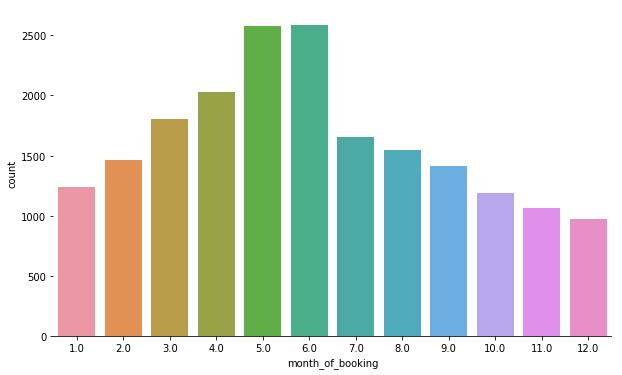

In [158]:
plt.figure(figsize=(10,6))
sns.countplot(data=ds_traveled.query('country_destination != "US"'), x='month_of_booking')
sns.despine(left=True)

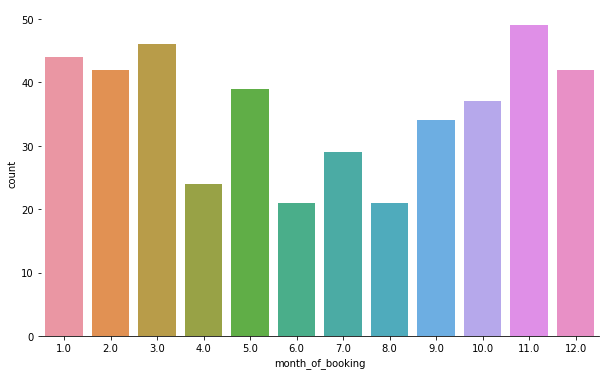

In [159]:
plt.figure(figsize=(10,6))
sns.countplot(data=data.query('country_destination == "AU"'), x='month_of_booking')
sns.despine(left=True)

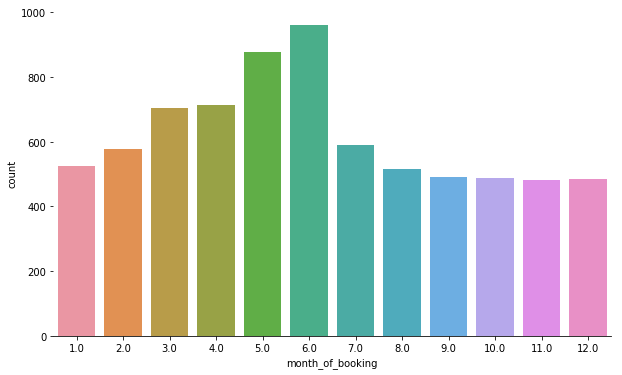

In [160]:
plt.figure(figsize=(10,6))
sns.countplot(data=data.query('country_destination == "other"'), x='month_of_booking')
sns.despine(left=True)

In [161]:
data.country_destination.unique()

array(['NDF', 'US', 'other', 'CA', 'FR', 'IT', 'ES', 'GB', 'NL', 'DE',
       'AU', 'PT'], dtype=object)

**15.** Graficar la actividad de los usuarios por día de la semana. ¿Cómo afecta esto a las campañas de marketing?

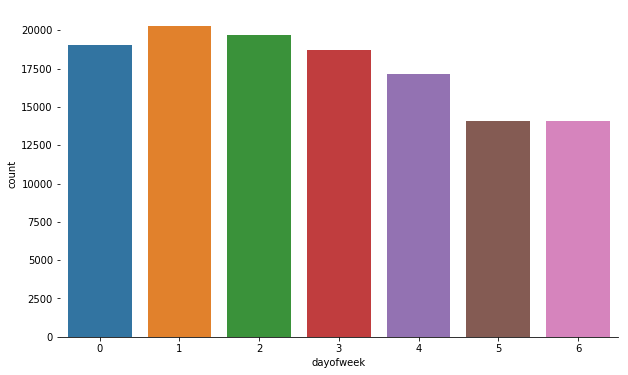

In [162]:
data['dayofweek']=data.timestamp_first_active.dt.dayofweek
# monday=0, sunday=6

plt.figure(figsize=(10,6))
sns.countplot(data=data, x='dayofweek')
sns.despine(left=True)

**16** ¿ Es mas efectivo (en terminos de conversión) un canal que otro?

In [163]:
data.query('affiliate_channel == "direct"')[:5]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,age_range,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,month_of_booking,time_booking_account,dayofweek
2,4ft3gnwmtx,2010-09-28,2009-06-09,2010-08-02,FEMALE,56.0,basic,"(55, 75]",3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,8.0,-57 days,1
3,bjjt8pjhuk,2011-12-05,2009-10-31,2012-09-08,FEMALE,42.0,facebook,"(35, 45]",0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,9.0,278 days,5
4,87mebub9p4,2010-09-14,2009-12-08,2010-02-18,NaN,41.0,basic,"(35, 45]",0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2.0,-208 days,1
7,0d01nltbrs,2010-01-03,2010-01-03,2010-01-13,FEMALE,47.0,basic,"(45, 55]",0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,1.0,10 days,6
15,v4d5rl22px,2010-01-07,2010-01-07,2010-01-08,FEMALE,33.0,basic,"(25, 35]",0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,CA,1.0,1 days,3


In [164]:
data['affiliate_channel'].unique()

array(['seo', 'direct', 'other', 'sem-non-brand', 'content', 'sem-brand',
       'remarketing', 'api'], dtype=object)

In [165]:
data['affiliate_provider'].unique()

array(['google', 'direct', 'craigslist', 'other', 'facebook', 'vast',
       'bing', 'meetup', 'facebook-open-graph', 'email-marketing',
       'yahoo', 'padmapper', 'wayn', 'gsp', 'baidu', 'naver', 'yandex'],
      dtype=object)

In [166]:
data['first_affiliate_tracked'].unique()

array(['untracked', 'omg', 'linked', nan, 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

In [167]:
data['conversion_time'] = data.date_first_booking - data.timestamp_first_active
data['conversion_time'] = data['conversion_time'].dt.days
data['conversion_time'].describe()

count    67202.000000
mean        51.147763
std         93.778974
min          0.000000
25%          1.000000
50%          4.000000
75%         46.000000
max       1369.000000
Name: conversion_time, dtype: float64

In [168]:
# Se excluyen los registros que tienen date_first_booking NaT ???
# Si, se excluyen... fijarse que coincide este count (67202) con el de ds_traveled
data[data.conversion_time<0][:5]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,age_range,signup_flow,language,...,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,month_of_booking,time_booking_account,dayofweek,conversion_time


Primero, medido en __cantidad de conversiones__

In [169]:
data['conversion_time'].groupby(data['affiliate_channel']).count()

affiliate_channel
api               2293
content            405
direct           45096
other             2705
remarketing        282
sem-brand         8369
sem-non-brand     5021
seo               3031
Name: conversion_time, dtype: int64

Luego, medido en el __tiempo promedio__ hasta la conversion

In [170]:
ds_channel=data['conversion_time'].groupby(data['affiliate_channel']).mean()
ds_channel

affiliate_channel
api              69.941561
content          78.817284
direct           51.221882
other            53.051756
remarketing      60.840426
sem-brand        49.673438
sem-non-brand    41.898227
seo              48.922138
Name: conversion_time, dtype: float64

In [171]:
# ds_channel.describe() - no aporta nada

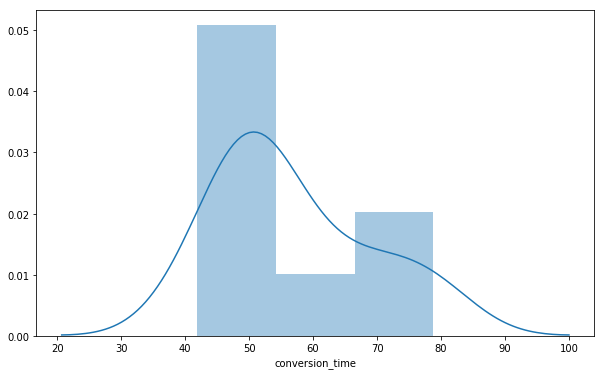

In [172]:
plt.figure(figsize=(10,6))
sns.distplot(ds_channel.dropna())

¿Cual es la media del tiempo de conversion en general (sin agrupar por canal)?

In [173]:
ds_gral=data['conversion_time'].mean()
ds_gral

51.14776345942085

Veamos ahora, como es la conversion comparando por __affiliate_provider__

Primero, comparando la cantidad de conversiones

In [174]:
ds_provider=data['conversion_time'].groupby(data['affiliate_provider']).count()
ds_provider

affiliate_provider
baidu                      8
bing                     576
craigslist              1149
direct                 44998
email-marketing           30
facebook                 647
facebook-open-graph      123
google                 15382
gsp                       34
meetup                    42
naver                     11
other                   3696
padmapper                208
vast                     182
wayn                       0
yahoo                    112
yandex                     4
Name: conversion_time, dtype: int64

Luego, comparando el tiempo medio para la conversion

In [175]:
ds_provider=data['conversion_time'].groupby(data['affiliate_provider']).mean()
ds_provider

affiliate_provider
baidu                   70.500000
bing                    38.465278
craigslist              42.743255
direct                  51.217032
email-marketing         83.566667
facebook                55.724884
facebook-open-graph     87.804878
google                  48.098557
gsp                    132.558824
meetup                 203.952381
naver                   39.636364
other                   62.093344
padmapper               79.620192
vast                    26.928571
wayn                          NaN
yahoo                   61.580357
yandex                  39.500000
Name: conversion_time, dtype: float64

In [176]:
ds_provider.describe()

count     16.000000
mean      70.249411
std       44.018248
min       26.928571
25%       41.966532
50%       58.652621
75%       80.606811
max      203.952381
Name: conversion_time, dtype: float64

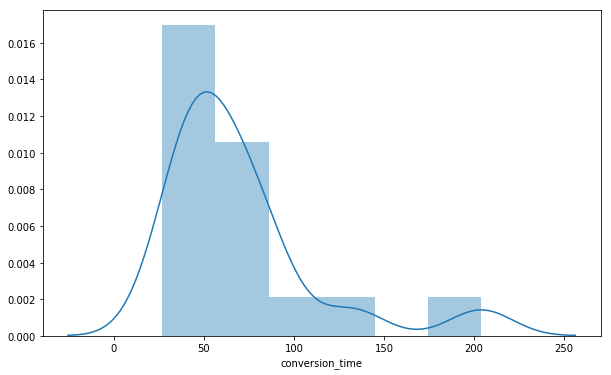

In [177]:
plt.figure(figsize=(10,6))
sns.distplot(ds_provider.dropna())

**17** Analicemos el rebote (sesiones que no se transforman en conversion)

In [178]:
data_no_converted = data.query(' country_destination == "NDF" ')
data_converted = data.query(' country_destination != "NDF" ')

In [179]:
data_no_converted['country_destination'].groupby(data_no_converted['affiliate_channel']).count()

affiliate_channel
api               3158
content           1652
direct           33943
other             2843
remarketing        320
sem-brand         6855
sem-non-brand     4859
seo               2258
Name: country_destination, dtype: int64

In [180]:
data_no_converted['country_destination'].groupby(data_no_converted['signup_method']).count()

signup_method
basic       21649
facebook    34181
google         58
Name: country_destination, dtype: int64

In [181]:
data_converted['country_destination'].groupby(data_converted['signup_method']).count()

signup_method
basic       43967
facebook    23152
google         83
Name: country_destination, dtype: int64

**18** ¿Hay alguna relación entre __age__ y __conversion_time__?

In [187]:
data_converted.conversion_time.describe()


count    67202.000000
mean        51.147763
std         93.778974
min          0.000000
25%          1.000000
50%          4.000000
75%         46.000000
max       1369.000000
Name: conversion_time, dtype: float64

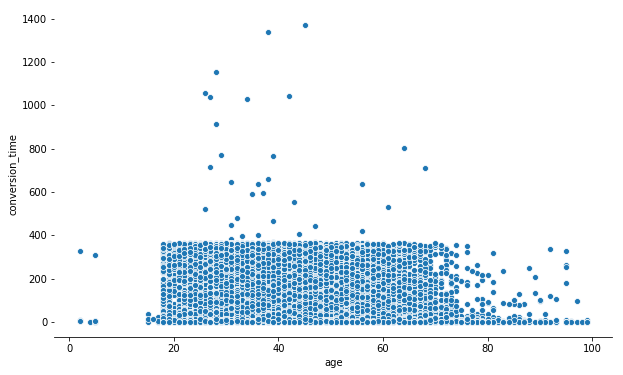

In [183]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_converted['age'], y=data_converted['conversion_time'] )
sns.despine(left=True)

**19** ¿El idioma determina el pais a viajar?

In [193]:
data_converted.groupby( data_converted['language'],data_converted['country_destination'] ).count()

TypeError: 'Series' objects are mutable, thus they cannot be hashed